In [1]:
import numpy as np
import pandas as pd
import json
import re
import random

In [2]:
import json

tweets = []

with open('ukraine-tweets.jsonl', 'r') as f:
    for line in f:
        # Parse the JSON data
        data = json.loads(line)
        tweets.append(data)

# Create a dataframe from the list of dictionaries
data = pd.DataFrame(tweets)

In [3]:
df = data.sample(n=1000, random_state=42)

In [4]:
df.head()

,text,edit_history_tweet_ids,created_at,author_id,id,entities.annotations,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,...,author.public_metrics.listed_count,author.username,author.name,entities.urls,entities.mentions,entities.hashtags,entities.cashtags,withheld.copyright,withheld.country_codes,author.withheld.country_codes
1801,RUSSIA wants to END the War by capturing Kiev ...,[1640936519455191046],2023-03-29T04:38:48.000Z,1594883649509400581,1640936519455191046,"[{'start': 0, 'end': 5, 'probability': 0.5363,...",0,0,0,0,...,4,SolemnJourney,Solemn Journey,"[{'start': 257, 'end': 280, 'url': 'https://t....",None,None,None,None,None,None
1190,@RepMikeRogersAL Ukraine continues its fight f...,[1640940270882545665],2023-03-29T04:53:42.000Z,2966809636,1640940270882545665,"[{'start': 17, 'end': 23, 'probability': 0.986...",0,0,0,0,...,1,ArtemiyMoroz,Artem Moroz 🇺🇦,None,"[{'start': 0, 'end': 16, 'username': 'RepMikeR...",None,None,None,None,None
1817,Ukraine War: 'Severe consequences' if Russia u...,[1640936406607450116],2023-03-29T04:38:21.000Z,1629471494655885315,1640936406607450116,"[{'start': 0, 'end': 10, 'probability': 0.723,...",0,0,0,0,...,0,17_nwo,Nwo,"[{'start': 115, 'end': 138, 'url': 'https://t....",None,"[{'start': 73, 'end': 80, 'tag': 'Canada'}, {'...",None,None,None,None
251,'I don't want people to feel sorry for me. I j...,[1640946681054212103],2023-03-29T05:19:10.000Z,10409622,1640946681054212103,None,0,0,0,0,...,58,thedextazlab,David Kisamfu,"[{'start': 78, 'end': 101, 'url': 'https://t.c...",None,None,None,None,None,None
2505,"@visegrad24 It would be wonderful if, in the f...",[1640931967360282624],2023-03-29T04:20:42.000Z,1499147748972666888,1640931967360282624,"[{'start': 135, 'end': 141, 'probability': 0.9...",0,0,0,0,...,0,Eduardo29161319,Eduardo Marques dos Santos,None,"[{'start': 0, 'end': 11, 'username': 'visegrad...",None,None,None,None,None


In [5]:
df = df[['text']]

In [6]:
df.shape

(1000, 1)

In [7]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [8]:

df['text'] = clean_tweets(df['text'])
df['text'].head()

1801    RUSSIA wants to END the War by capturing Kiev ...
1190     Ukraine continues its fight for security of t...
1817    Ukraine War: 'Severe consequences' if Russia u...
251     'I don't want people to feel sorry for me. I j...
2505     It would be wonderful if, in the form of a pr...
Name: text, dtype: object

In [9]:
from textblob import TextBlob

# Define a function to get sentiment polarity and subjectivity using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply the function to the "text" column of the data frame
sentiments = df['text'].apply(get_sentiment)

# Create two new columns in the data frame to store the sentiment polarity and subjectivity
df['polarity'] = [s[0] for s in sentiments]
df['subjectivity'] = [s[1] for s in sentiments]


In [10]:
df.head()

,text,polarity,subjectivity
1801,RUSSIA wants to END the War by capturing Kiev ...,0.100000,0.550000
1190,Ukraine continues its fight for security of t...,0.104167,0.083333
1817,Ukraine War: 'Severe consequences' if Russia u...,0.000000,0.000000
251,'I don't want people to feel sorry for me. I j...,-0.500000,1.000000
2505,"It would be wonderful if, in the form of a pr...",0.666667,0.785714


# Sentiment Classification Using NLTK

In [11]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\ehtisham
[nltk_data]     raza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
sia = SentimentIntensityAnalyzer()

In [13]:
# Assuming your dataframe is called `df` and the tweet text is in a column called `text`
df['sentiment_nltk'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [14]:
df.head()

,text,polarity,subjectivity,sentiment_nltk
1801,RUSSIA wants to END the War by capturing Kiev ...,0.100000,0.550000,-0.8934
1190,Ukraine continues its fight for security of t...,0.104167,0.083333,0.5526
1817,Ukraine War: 'Severe consequences' if Russia u...,0.000000,0.000000,-0.8271
251,'I don't want people to feel sorry for me. I j...,-0.500000,1.000000,-0.1887
2505,"It would be wonderful if, in the form of a pr...",0.666667,0.785714,0.7783


# Sentiment Classification using TextBlob

In [15]:
from textblob import TextBlob

df['sentiment_textblob'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


# Sentiment Classification using Vader

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\ehtisham
[nltk_data]     raza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sia = SentimentIntensityAnalyzer()
# Assuming your dataframe is called `df` and the tweet text is in a column called `text`
df['sentiment_vader'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [18]:
df.head()

,text,polarity,subjectivity,sentiment_nltk,sentiment_textblob,sentiment_vader
1801,RUSSIA wants to END the War by capturing Kiev ...,0.100000,0.550000,-0.8934,0.100000,-0.8934
1190,Ukraine continues its fight for security of t...,0.104167,0.083333,0.5526,0.104167,0.5526
1817,Ukraine War: 'Severe consequences' if Russia u...,0.000000,0.000000,-0.8271,0.000000,-0.8271
251,'I don't want people to feel sorry for me. I j...,-0.500000,1.000000,-0.1887,-0.500000,-0.1887
2505,"It would be wonderful if, in the form of a pr...",0.666667,0.785714,0.7783,0.666667,0.7783


In [19]:
df.head()

,text,polarity,subjectivity,sentiment_nltk,sentiment_textblob,sentiment_vader
1801,RUSSIA wants to END the War by capturing Kiev ...,0.100000,0.550000,-0.8934,0.100000,-0.8934
1190,Ukraine continues its fight for security of t...,0.104167,0.083333,0.5526,0.104167,0.5526
1817,Ukraine War: 'Severe consequences' if Russia u...,0.000000,0.000000,-0.8271,0.000000,-0.8271
251,'I don't want people to feel sorry for me. I j...,-0.500000,1.000000,-0.1887,-0.500000,-0.1887
2505,"It would be wonderful if, in the form of a pr...",0.666667,0.785714,0.7783,0.666667,0.7783


# Sentiment Classification Pointwise Mutual Information (PMI) 

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import nltk
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to C:\Users\ehtisham
[nltk_data]     raza\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

In [21]:
# Load the opinion lexicon
pos_words = set(opinion_lexicon.positive())
neg_words = set(opinion_lexicon.negative())


In [22]:
finder = BigramCollocationFinder.from_documents([word_tokenize(tweet['text']) for tweet in tweets])
measures = BigramAssocMeasures()

In [23]:
# Calculate the PMI of each bigram and sort them by their PMI score
pmis = finder.score_ngrams(measures.pmi)
pmis_sorted = sorted(pmis, key=lambda x: x[1], reverse=True)

In [24]:
import nltk
from nltk.collocations import *
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
# Create a list of all the tweets
tweets = df['text'].tolist()

In [25]:
# Tokenize the tweets
tokenized_tweets = [nltk.word_tokenize(tweet.lower()) for tweet in tweets]

In [26]:
# Load the opinion lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [27]:
# Calculate the frequency of each word in the tweets
word_freq = nltk.FreqDist([word for tweet in tokenized_tweets for word in tweet])

In [28]:

# Calculate the frequency of positive and negative words in the tweets
positive_word_freq = nltk.FreqDist([word for tweet in tokenized_tweets for word in tweet if word in positive_words])
negative_word_freq = nltk.FreqDist([word for tweet in tokenized_tweets for word in tweet if word in negative_words])


In [29]:

# Calculate the total number of words and tweets
total_words = sum(word_freq.values())
total_tweets = len(tweets)


In [30]:

# Calculate the PMI for each word
pmi_scores = {}
for word in word_freq.keys():
    if word in positive_words or word in negative_words:
        p_word = positive_word_freq[word]/total_words
        n_word = negative_word_freq[word]/total_words
        pmi_scores[word] = p_word/(n_word+1e-12)

# Calculate the sentiment score for each tweet
sentiment_scores = []
for tweet in tokenized_tweets:
    score = 0
    for word in tweet:
        if word in pmi_scores:
            score += pmi_scores[word]
    sentiment_scores.append(score)


In [31]:

# Classify the sentiment of each tweet as positive or negative
threshold = sum(sentiment_scores)/total_tweets
sentiments = []
for score in sentiment_scores:
    if score >= threshold:
        sentiments.append('positive')
    else:
        sentiments.append('negative')

# Add the sentiment column to the DataFrame
df['sentiment_pmi'] = sentiments


In [32]:
df.head()

,text,polarity,subjectivity,sentiment_nltk,sentiment_textblob,sentiment_vader,sentiment_pmi
1801,RUSSIA wants to END the War by capturing Kiev ...,0.100000,0.550000,-0.8934,0.100000,-0.8934,negative
1190,Ukraine continues its fight for security of t...,0.104167,0.083333,0.5526,0.104167,0.5526,positive
1817,Ukraine War: 'Severe consequences' if Russia u...,0.000000,0.000000,-0.8271,0.000000,-0.8271,negative
251,'I don't want people to feel sorry for me. I j...,-0.500000,1.000000,-0.1887,-0.500000,-0.1887,negative
2505,"It would be wonderful if, in the form of a pr...",0.666667,0.785714,0.7783,0.666667,0.7783,negative


# Results Comparison

In [33]:
import pandas as pd

# Assuming your dataframe is called `df`
# Create a new column to store the comparison result
df['sentiment_comparison'] = ''

# Iterate over each row of the dataframe
for i, row in df.iterrows():
    textblob_sentiment = row['sentiment_textblob']
    vader_sentiment = row['sentiment_vader']
    nltk_sentiment = row['sentiment_nltk']
    
    # Compare the sentiment analysis results
    if textblob_sentiment == vader_sentiment == nltk_sentiment:
        comparison_result = 'All Methods have Same'
    elif textblob_sentiment == vader_sentiment or textblob_sentiment == nltk_sentiment or vader_sentiment == nltk_sentiment:
        comparison_result = 'Two Methods have Same'
    else:
        comparison_result = 'None of Methods have same'
    
    # Assign the comparison result to the new column
    df.at[i, 'sentiment_comparison'] = comparison_result


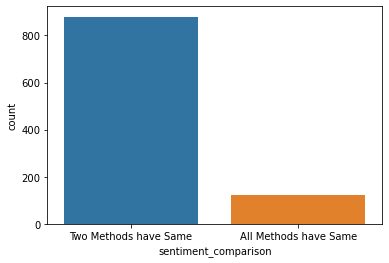

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called `df` and the sentiment result is in a column called `sentiment`
sns.countplot(x='sentiment_comparison', data=df)
plt.show()


In [35]:
df['sentiment_nltk'] = df['sentiment_nltk'].apply(lambda x: 'negative' if x < 0 else ('positive' if x > 0 else 'neutral'))
df['sentiment_textblob'] = df['sentiment_textblob'].apply(lambda x: 'negative' if x < 0 else ('positive' if x > 0 else 'neutral'))
df['sentiment_vader'] = df['sentiment_vader'].apply(lambda x: 'negative' if x < 0 else ('positive' if x > 0 else 'neutral'))

In [36]:
df.head()

,text,polarity,subjectivity,sentiment_nltk,sentiment_textblob,sentiment_vader,sentiment_pmi,sentiment_comparison
1801,RUSSIA wants to END the War by capturing Kiev ...,0.100000,0.550000,negative,positive,negative,negative,Two Methods have Same
1190,Ukraine continues its fight for security of t...,0.104167,0.083333,positive,positive,positive,positive,Two Methods have Same
1817,Ukraine War: 'Severe consequences' if Russia u...,0.000000,0.000000,negative,neutral,negative,negative,Two Methods have Same
251,'I don't want people to feel sorry for me. I j...,-0.500000,1.000000,negative,negative,negative,negative,Two Methods have Same
2505,"It would be wonderful if, in the form of a pr...",0.666667,0.785714,positive,positive,positive,negative,Two Methods have Same


In [37]:
import pandas as pd

# Assuming your dataframe is called `df`
# Create a new column to store the comparison result
df['PMI_vs_NLTK'] = ''

# Iterate over each row of the dataframe
for i, row in df.iterrows():
    nltk_sentiment = row['sentiment_nltk']
    sentiment_pmi = row['sentiment_pmi']
    # Compare the sentiment analysis results
    if  sentiment_pmi== nltk_sentiment:
        comparison_result = 'Same'

    else:
        comparison_result = 'Different'
    
    # Assign the comparison result to the new column
    df.at[i, 'PMI_vs_NLTK'] = comparison_result


In [38]:
df.head()

,text,polarity,subjectivity,sentiment_nltk,sentiment_textblob,sentiment_vader,sentiment_pmi,sentiment_comparison,PMI_vs_NLTK
1801,RUSSIA wants to END the War by capturing Kiev ...,0.100000,0.550000,negative,positive,negative,negative,Two Methods have Same,Same
1190,Ukraine continues its fight for security of t...,0.104167,0.083333,positive,positive,positive,positive,Two Methods have Same,Same
1817,Ukraine War: 'Severe consequences' if Russia u...,0.000000,0.000000,negative,neutral,negative,negative,Two Methods have Same,Same
251,'I don't want people to feel sorry for me. I j...,-0.500000,1.000000,negative,negative,negative,negative,Two Methods have Same,Same
2505,"It would be wonderful if, in the form of a pr...",0.666667,0.785714,positive,positive,positive,negative,Two Methods have Same,Different


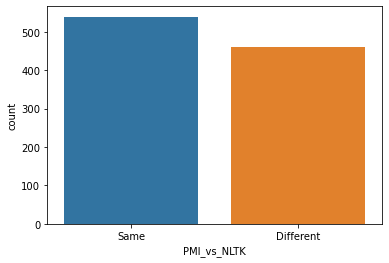

In [39]:
sns.countplot(x='PMI_vs_NLTK', data=df)
plt.show()